In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Straight path analysis

In [2]:
df = pd.read_csv(r"C:\Maila_4\Project\OurGitRepo\UWPathYDirection.csv")

In [3]:
df.head()

,xPosition,yPosition
0,0.078,8.042
1,0.078,8.042
2,0.078,8.042
3,0.078,8.042
4,-0.127,8.383


In [4]:
df.tail()

,xPosition,yPosition
33,0.164,17.627
34,-0.023,18.381
35,0.265,18.529
36,0.265,18.529
37,0.562,18.887


In [5]:
shape = df.shape
shape

(38, 2)

Create lists to store positions of the data frame

In [6]:
xPositions = []
yPositions = []

In [7]:
index = 0

while index < shape[0]:
    xPositions.append(df.iloc[index, 0])
    yPositions.append(df.iloc[index, 1])
    index = index+1

Define the functions that are needed for the prediction

In [8]:
def calculatePath (points, timeDelta):
    pointArray = np.array([])

    for point in points:
        pointArray = np.append(pointArray, point)
    
    timeArray = np.arange(0, timeDelta*len(points), timeDelta)
    timeArray = timeArray.reshape(-1, 1) #must be reshaped, otherwise the regression can't be done
    
    model = LinearRegression().fit(timeArray, pointArray)

    return model.coef_, model.intercept_

In [9]:
def predictNextPositions (points, coefficients, intercept, timeDelta, timeToPredict):
    predictedPoints = [] #Empty list where the future X or Y values will be stored
    timeValue = (len(points)-1)*timeDelta #Time value of the last known point assuming first element of the list points is in t=0
    finalTimeToPredict = timeValue+timeToPredict #Calculate the time value for the last point that is gonna be predicted
    
    while timeValue < finalTimeToPredict:
        timeValue = timeValue+timeDelta
        predictedPoints.append(timeValue*coefficients[0]+intercept)
    
    return predictedPoints

In [10]:
def getSpecifiedPoints (points, positions_into_consideration):
    pointArray = np.array([])
    positions_into_consideration___=positions_into_consideration
    while positions_into_consideration!=0:
        pointArray = np.append(pointArray, points[positions_into_consideration-positions_into_consideration___])
        positions_into_consideration___=positions_into_consideration___-1
    
    

    return pointArray

Compare predicted path with real path, changing the points taken for prediction
1-time to predict=10

In [11]:
timeBetweenSamples=0.25
timetopredict=7.5

personXCoef, personXinter = calculatePath (xPositions[0: 12], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[0: 12], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[0: 12], personXCoef, personXinter, timeBetweenSamples, timetopredict)
YPredictions = predictNextPositions (yPositions[0: 12], personYCoef, personYinter, timeBetweenSamples, timetopredict)       
                

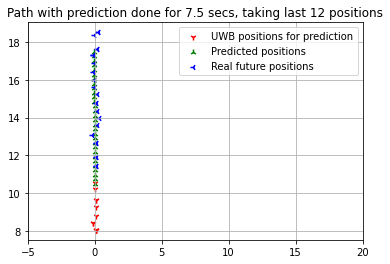

In [12]:
plt.figure()
plt.grid("True")
plt.scatter(xPositions[0: 12], yPositions [0: 12], label = "UWB positions for prediction", color = "r", marker = "1")
plt.scatter(xPredictions, YPredictions, label= "Predicted positions", color = "g", marker = "2")
plt.scatter(xPositions[13: -1], yPositions [13: -1], label = "Real future positions", color = "b", marker = "3")
plt.xlim(-5, 20)
plt.legend()
plt.title("Path with prediction done for 7.5 secs, taking last 12 positions")
plt.show()

In [13]:
timeBetweenSamples=0.25
timetopredict=7.5

personXCoef, personXinter = calculatePath (xPositions[6: 12], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[6: 12], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[6: 12], personXCoef, personXinter, timeBetweenSamples, timetopredict)
YPredictions = predictNextPositions (yPositions[6: 12], personYCoef, personYinter, timeBetweenSamples, timetopredict)    

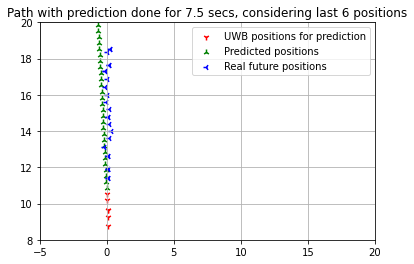

In [14]:
plt.figure()
plt.grid("True")
plt.scatter(xPositions[6: 12], yPositions [6: 12], label = "UWB positions for prediction", color = "r", marker = "1")
plt.scatter(xPredictions, YPredictions, label= "Predicted positions", color = "g", marker = "2")
plt.scatter(xPositions[13: -1], yPositions [13: -1], label = "Real future positions", color = "b", marker = "3")
plt.xlim(-5, 20)
plt.ylim(8,20)
plt.legend()
plt.title("Path with prediction done for 7.5 secs, considering last 6 positions")
plt.show()

In [15]:
timeBetweenSamples=0.25
timetopredict=7.5

personXCoef, personXinter = calculatePath (xPositions[8: 12], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[8: 12], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[8: 12], personXCoef, personXinter, timeBetweenSamples, timetopredict)
YPredictions = predictNextPositions (yPositions[8: 12], personYCoef, personYinter, timeBetweenSamples, timetopredict)  

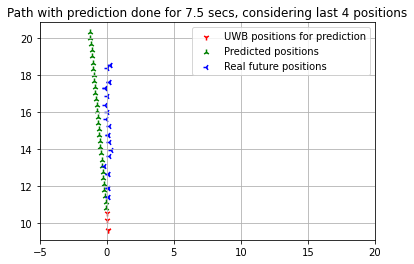

In [16]:
plt.figure()
plt.grid("True")
plt.scatter(xPositions[8: 12], yPositions [8: 12], label = "UWB positions for prediction", color = "r", marker = "1")
plt.scatter(xPredictions, YPredictions, label= "Predicted positions", color = "g", marker = "2")
plt.scatter(xPositions[13: -1], yPositions [13: -1], label = "Real future positions", color = "b", marker = "3")
plt.xlim(-5, 20)
plt.legend()
plt.title("Path with prediction done for 7.5 secs, considering last 4 positions")
plt.show()

# Non straight analysis

In [17]:
df = pd.read_csv(r"C:\Maila_4\Project\OurGitRepo\UWPathXYDirection.csv")

In [18]:
df.head()

,xPosition,yPosition
0,-6.613,4.66
1,-6.613,4.66
2,-6.613,4.66
3,-6.613,4.66
4,-6.613,4.66


In [19]:
df.tail()

,xPosition,yPosition
31,0.323,9.229
32,0.323,9.229
33,0.504,9.689
34,0.504,9.689
35,0.532,10.282


In [20]:
shape = df.shape
shape

(36, 2)

Create lists to store positions of the data frame

In [21]:
xPositions = []
yPositions = []

In [22]:
index = 0

while index < shape[0]:
    xPositions.append(df.iloc[index, 0])
    yPositions.append(df.iloc[index, 1])
    index = index+1

Define the functions that are needed for the prediction

In [23]:
def calculatePath (points, timeDelta):
    pointArray = np.array([])

    for point in points:
        pointArray = np.append(pointArray, point)
    
    timeArray = np.arange(0, timeDelta*len(points), timeDelta)
    timeArray = timeArray.reshape(-1, 1) #must be reshaped, otherwise the regression can't be done
    
    model = LinearRegression().fit(timeArray, pointArray)

    return model.coef_, model.intercept_

In [24]:
def predictNextPositions (points, coefficients, intercept, timeDelta, timeToPredict):
    predictedPoints = [] #Empty list where the future X or Y values will be stored
    timeValue = (len(points)-1)*timeDelta #Time value of the last known point assuming first element of the list points is in t=0
    finalTimeToPredict = timeValue+timeToPredict #Calculate the time value for the last point that is gonna be predicted
    
    while timeValue < finalTimeToPredict:
        timeValue = timeValue+timeDelta
        predictedPoints.append(timeValue*coefficients[0]+intercept)
    
    return predictedPoints

In [25]:
def getSpecifiedPoints (points, positions_into_consideration):
    pointArray = np.array([])
    positions_into_consideration___=positions_into_consideration
    while positions_into_consideration!=0:
        pointArray = np.append(pointArray, points[positions_into_consideration-positions_into_consideration___])
        positions_into_consideration___=positions_into_consideration___-1
    
    

    return pointArray

Compare predicted path with real path, changing the points taken for prediction
1-time to predict=10

In [26]:
timeBetweenSamples=0.25
timetopredict=7.5

personXCoef, personXinter = calculatePath (xPositions[4: 16], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[4: 16], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[4: 16], personXCoef, personXinter, timeBetweenSamples, timetopredict)
YPredictions = predictNextPositions (yPositions[4: 16], personYCoef, personYinter, timeBetweenSamples, timetopredict)       
                

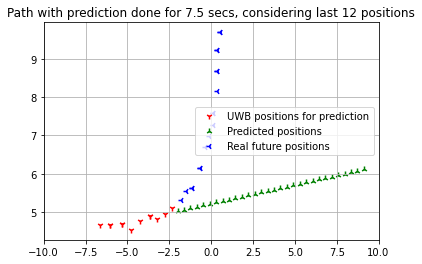

In [27]:
plt.figure()
plt.grid("True")
plt.scatter(xPositions[4: 16], yPositions [4: 16], label = "UWB positions for prediction", color = "r", marker = "1")
plt.scatter(xPredictions, YPredictions, label= "Predicted positions", color = "g", marker = "2")
plt.scatter(xPositions[17: -1], yPositions [17: -1], label = "Real future positions", color = "b", marker = "3")
plt.xlim(-10, 10)
plt.legend()
plt.title("Path with prediction done for 7.5 secs, considering last 12 positions")
plt.show()

In [28]:
timeBetweenSamples=0.25
timetopredict=7.5

personXCoef, personXinter = calculatePath (xPositions[10+4+4: 16+4+4], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[10+4+4: 16+4+4], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[10+4+4: 16+4+4], personXCoef, personXinter, timeBetweenSamples, timetopredict)
YPredictions = predictNextPositions (yPositions[10+4+4: 16+4+4], personYCoef, personYinter, timeBetweenSamples, timetopredict)    

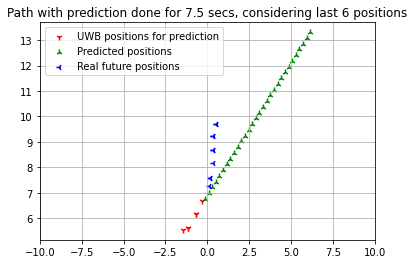

In [29]:
plt.figure()
plt.grid("True")
plt.scatter(xPositions[10+4+4: 16+4+4], yPositions [10+4+4: 16+4+4], label = "UWB positions for prediction", color = "r", marker = "1")
plt.scatter(xPredictions, YPredictions, label= "Predicted positions", color = "g", marker = "2")
plt.scatter(xPositions[17+4+4: -1], yPositions [17+4+4: -1], label = "Real future positions", color = "b", marker = "3")
plt.xlim(-10, 10)
plt.legend()
plt.title("Path with prediction done for 7.5 secs, considering last 6 positions")
plt.show()

In [30]:
timeBetweenSamples=0.25
timetopredict=7.5

personXCoef, personXinter = calculatePath (xPositions[12: 16], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[12: 16], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[12: 16], personXCoef, personXinter, timeBetweenSamples, timetopredict)
YPredictions = predictNextPositions (yPositions[12: 16], personYCoef, personYinter, timeBetweenSamples, timetopredict)  

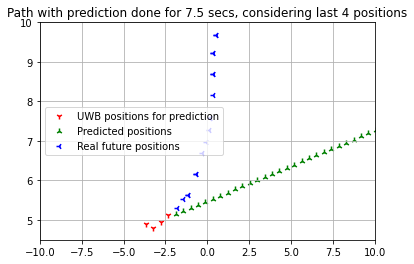

In [31]:
plt.figure()
plt.grid("True")
plt.scatter(xPositions[12: 16], yPositions [12: 16], label = "UWB positions for prediction", color = "r", marker = "1")
plt.scatter(xPredictions, YPredictions, label= "Predicted positions", color = "g", marker = "2")
plt.scatter(xPositions[17: -1], yPositions [17: -1], label = "Real future positions", color = "b", marker = "3")
plt.xlim(-10, 10)
plt.ylim(4.5, 10)
plt.legend()
plt.title("Path with prediction done for 7.5 secs, considering last 4 positions")
plt.show()

# Back and force trajectory


In [32]:
df = pd.read_csv(r"C:\Maila_4\Project\OurGitRepo\UWPathForwardNBackward.csv")

In [33]:
df.head()

,xPosition,yPosition
0,1.030,10.360
1,0.707,10.931
2,0.707,10.931
3,0.872,11.298
4,0.867,11.664


In [34]:
df.tail()

,xPosition,yPosition
31,0.935,9.488
32,1.156,9.261
33,1.432,9.143
34,1.280,8.835
35,1.280,8.835


In [35]:
shape = df.shape
shape

(36, 2)

Create lists to store positions of the data frame

In [36]:
xPositions = []
yPositions = []

In [37]:
index = 0

while index < shape[0]:
    xPositions.append(df.iloc[index, 0])
    yPositions.append(df.iloc[index, 1])
    index = index+1

Define the functions that are needed for the prediction

In [38]:
def calculatePath (points, timeDelta):
    pointArray = np.array([])

    for point in points:
        pointArray = np.append(pointArray, point)
    
    timeArray = np.arange(0, timeDelta*len(points), timeDelta)
    timeArray = timeArray.reshape(-1, 1) #must be reshaped, otherwise the regression can't be done
    
    model = LinearRegression().fit(timeArray, pointArray)

    return model.coef_, model.intercept_

In [39]:
def predictNextPositions (points, coefficients, intercept, timeDelta, timeToPredict):
    predictedPoints = [] #Empty list where the future X or Y values will be stored
    timeValue = (len(points)-1)*timeDelta #Time value of the last known point assuming first element of the list points is in t=0
    finalTimeToPredict = timeValue+timeToPredict #Calculate the time value for the last point that is gonna be predicted
    
    while timeValue < finalTimeToPredict:
        timeValue = timeValue+timeDelta
        predictedPoints.append(timeValue*coefficients[0]+intercept)
    
    return predictedPoints

In [40]:
def getSpecifiedPoints (points, positions_into_consideration):
    pointArray = np.array([])
    positions_into_consideration___=positions_into_consideration
    while positions_into_consideration!=0:
        pointArray = np.append(pointArray, points[positions_into_consideration-positions_into_consideration___])
        positions_into_consideration___=positions_into_consideration___-1
    
    

    return pointArray

Compare predicted path with real path, changing the points taken for prediction
1-time to predict=10

In [52]:
timeBetweenSamples=0.25
timetopredict=7.5

personXCoef, personXinter = calculatePath (xPositions[4+4+4: 16+4+4], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[4+4+4: 16+4+4], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[4+4+4: 16+4+4], personXCoef, personXinter, timeBetweenSamples, timetopredict)
YPredictions = predictNextPositions (yPositions[4+4+4: 16+4+4], personYCoef, personYinter, timeBetweenSamples, timetopredict)       
                

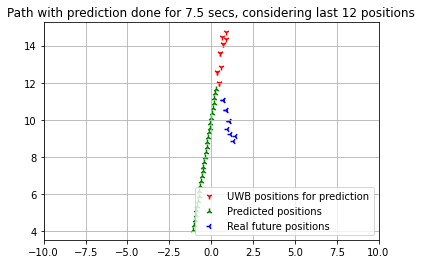

In [53]:
plt.figure()
plt.grid("True")
plt.scatter(xPositions[4+4+4: 16+4+4], yPositions [4+4+4: 16+4+4], label = "UWB positions for prediction", color = "r", marker = "1")
plt.scatter(xPredictions, YPredictions, label= "Predicted positions", color = "g", marker = "2")
plt.scatter(xPositions[17+4+4: -1], yPositions [17+4+4: -1], label = "Real future positions", color = "b", marker = "3")
plt.xlim(-10, 10)
plt.legend()
plt.title("Path with prediction done for 7.5 secs, considering last 12 positions")
plt.show()

In [56]:
timeBetweenSamples=0.25
timetopredict=7.5

personXCoef, personXinter = calculatePath (xPositions[12+4+4: 16+4+4], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[12+4+4: 16+4+4], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[12+4+4: 16+4+4], personXCoef, personXinter, timeBetweenSamples, timetopredict)
YPredictions = predictNextPositions (yPositions[12+4+4: 16+4+4], personYCoef, personYinter, timeBetweenSamples, timetopredict)  

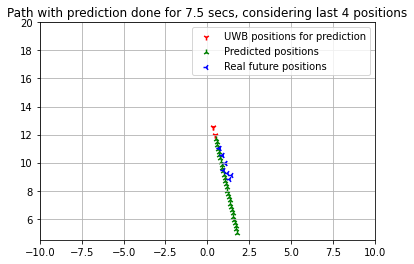

In [57]:
plt.figure()
plt.grid("True")
plt.scatter(xPositions[12+4+4: 16+4+4], yPositions [12+4+4: 16+4+4], label = "UWB positions for prediction", color = "r", marker = "1")
plt.scatter(xPredictions, YPredictions, label= "Predicted positions", color = "g", marker = "2")
plt.scatter(xPositions[17+4+4: -1], yPositions [17+4+4: -1], label = "Real future positions", color = "b", marker = "3")
plt.xlim(-10, 10)
plt.ylim(4.5, 20)
plt.legend()
plt.title("Path with prediction done for 7.5 secs, considering last 4 positions")
plt.show()

In [45]:
yPositions [12+1: 16+1]


[14.72, 14.44, 14.061, 14.061]